# TF-IDF Optimization 

This notebook (toward the end) details the use of TF-IDF to optimize logistic regression by ~5 points. 

# Setup

In [55]:
# Load timer
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 782 µs


In [56]:
# Import necessary libraries 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
#nltk.download()
import re
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

# Turn off warnings
import warnings 
warnings.simplefilter('ignore')

time: 958 µs


In [57]:
# Import cleaned data
emails = pd.read_csv("emails_v2.csv")
emails = emails.drop(['Unnamed: 0'], axis=1)
emails['Date'] = pd.to_datetime(emails['Date']).dt.date

time: 755 ms


In [58]:
emails.head()

,Date,From,Message-Body,Verbosity
0,2001-05-14,phillip.allen@enron.com,forecast,0
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51
2,2000-10-18,phillip.allen@enron.com,successful way go test,3
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10
4,2000-08-31,phillip.allen@enron.com,shoot let,1


time: 15 ms


# Add Gender Label

In [59]:
#Get the unique set of names from senders

set(emails['From'])

{'steven.bailey@enron.com',
 'leann.walton@enron.com',
 'paul.thomas@enron.com',
 'lipshutz@enron.com',
 'fiona.stewart@enron.com',
 'kenneth.lambert@enron.com',
 'laura.vuittonet@enron.com',
 'nancy.corbet@enron.com',
 'kenneth.kaase@enron.com',
 'bryan.gottfredson@enron.com',
 'matilda.machado@enron.com',
 'ted.bland@enron.com',
 'mark.confer@enron.com',
 'manuel.gallego@enron.com',
 'holly.heath@enron.com',
 'darren.cavanaugh@enron.com',
 'jess.hewitt@enron.com',
 'kathy.kokas@enron.com',
 'barbara.lee@enron.com',
 'hillary.mack@enron.com',
 'andy.blanchard@enron.com',
 'michelle.nelson@enron.com',
 'l..nowlan@enron.com',
 'mark.fischer@enron.com',
 'adarsh.vakharia@enron.com',
 'lei.chen@enron.com',
 'marian.bryant@enron.com',
 'kirk.pierce@enron.com',
 'coralina.rivera@enron.com',
 'claudia.clark@enron.com',
 'david.hensel@enron.com',
 'carole.frank@enron.com',
 'gary.hickerson@enron.com',
 'richard.weeks@enron.com',
 'basil.karampelas@enron.com',
 'don.baughman@enron.com',
 'kath

time: 17.8 ms


In [60]:
# Create function to get the gender based on the first name 

import gender_guesser.detector as gender
d = gender.Detector()

def get_gender(email):
    name = email.capitalize().split('.')[0]
    sex = d.get_gender(name)
    return sex

time: 339 ms


In [61]:
# Get gender and add new column

emails['Gender'] = emails['From'].apply(get_gender)

emails.head()

,Date,From,Message-Body,Verbosity,Gender
0,2001-05-14,phillip.allen@enron.com,forecast,0,male
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male


time: 1.31 s


The percentage of male emails was:  0.49622405541258807
The percentage of female emails was:  0.275651971748559
The percentage of unknown emails was:  0.13795425575410664
The percentage of mostly_male emails was:  0.04704297842660959
The percentage of mostly_female emails was:  0.040016194072328176
The percentage of androgynous emails was:  0.0031105445858085412


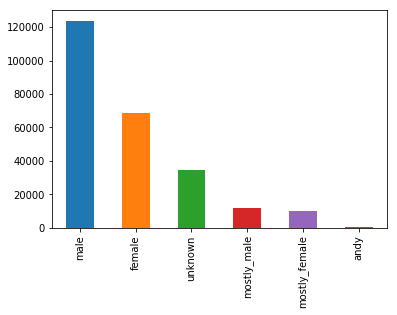

time: 339 ms


In [62]:
# Review statsitics for Gender in the df

emails['Gender'].value_counts().plot(kind='bar')

print ("The percentage of male emails was: ", sum(emails['Gender']=='male') / 249474)
print ("The percentage of female emails was: ", sum(emails['Gender']=='female') / 249474)
print ("The percentage of unknown emails was: ", sum(emails['Gender']=='unknown') / 249474)
print ("The percentage of mostly_male emails was: ", sum(emails['Gender']=='mostly_male') / 249474)
print ("The percentage of mostly_female emails was: ", sum(emails['Gender']=='mostly_female') / 249474)
print ("The percentage of androgynous emails was: ", sum(emails['Gender']=='andy') / 249474)

# Add Stock Price Label

In [63]:
# Convert relevant stockdates into dataframe/datetime format

date_list = ['2000-08-23', '2000-10-23', '2000-12-23', '2001-02-23', '2001-04-23', '2001-06-23', '2001-08-23', '2001-10-23', '2001-12-23']
date_list = pd.DataFrame({'stock_dates':date_list})
date_list['stock_dates'] = pd.to_datetime(date_list['stock_dates']).dt.date

time: 2.02 ms


In [64]:
# Write a function that gets the stock price for different date ranges

def get_stockprice(date):
    if   date >= date_list['stock_dates'].loc[0] and  date < date_list['stock_dates'].loc[1]:
        price = 90
    elif date >= date_list['stock_dates'].loc[1] and  date < date_list['stock_dates'].loc[2]:
        price = 83
    elif date >= date_list['stock_dates'].loc[2] and  date < date_list['stock_dates'].loc[3]:
        price = 85
    elif date >= date_list['stock_dates'].loc[3] and  date < date_list['stock_dates'].loc[4]:
        price = 70
    elif date >= date_list['stock_dates'].loc[4] and  date < date_list['stock_dates'].loc[5]:
        price = 62
    elif date >= date_list['stock_dates'].loc[5] and  date < date_list['stock_dates'].loc[6]:
        price = 50
    elif date >= date_list['stock_dates'].loc[6] and  date < date_list['stock_dates'].loc[7]:
        price = 36
    elif date >= date_list['stock_dates'].loc[7] and  date < date_list['stock_dates'].loc[8]:
        price = 20
    else:
        price = None
    return price 

time: 2.78 ms


In [65]:
# Get stock price and add new column

emails['Stock'] = emails['Date'].apply(get_stockprice)

emails.head()

,Date,From,Message-Body,Verbosity,Gender,Stock
0,2001-05-14,phillip.allen@enron.com,forecast,0,male,62.0
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male,62.0
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male,90.0
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male,83.0
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male,90.0


time: 54.2 s


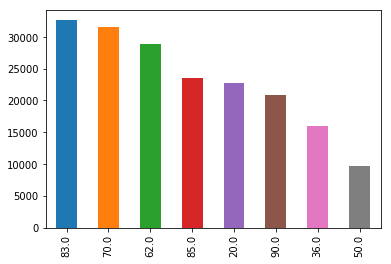

time: 156 ms


In [66]:
# Visualize histogram for stockprice  

emails['Stock'].value_counts().plot(kind='bar')

# Add Sentiment Label

In [67]:
# Reduce the dataset down to those emails during the stock descent

emails = emails[ emails['Stock'].notnull()]

time: 84.5 ms


In [68]:
# New shape

emails.shape

(185680, 6)

time: 2.23 ms


In [69]:
# Write function to get the senitment or polarity and subjectivity 

def get_sentiment_fastest(message):
    score1 = TextBlob(message).sentiment[0]
    score2 = TextBlob(message).sentiment[1]
    return [score1, score2]

time: 1.26 ms


In [70]:
# Execute the function

emails['Scores'] = emails['Message-Body'].apply(get_sentiment_fastest)

emails.head()

,Date,From,Message-Body,Verbosity,Gender,Stock,Scores
0,2001-05-14,phillip.allen@enron.com,forecast,0,male,62.0,"[0.0, 0.0]"
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male,62.0,"[0.15000000000000002, 0.6133333333333334]"
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male,90.0,"[0.75, 0.95]"
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male,83.0,"[0.0, 0.0]"
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male,90.0,"[0.0, 0.0]"


time: 1min 29s


In [71]:
# Convert list to string  

emails['Scores'] = [','.join(map(str, l)) for l in emails['Scores']]

time: 330 ms


In [72]:
# Split score into measures and convert to numeric 

emails['Polarity'], emails['Subjectivity'] = emails['Scores'].str.split(',', 1).str
emails['Polarity'] = pd.to_numeric(emails['Polarity'])
emails['Subjectivity'] = pd.to_numeric(emails['Subjectivity'])

emails.head()

,Date,From,Message-Body,Verbosity,Gender,Stock,Scores,Polarity,Subjectivity
0,2001-05-14,phillip.allen@enron.com,forecast,0,male,62.0,"0.0,0.0",0.00,0.000000
1,2001-05-04,phillip.allen@enron.com,better turn honest far suggestion waiting nece...,51,male,62.0,"0.15000000000000002,0.6133333333333334",0.15,0.613333
2,2000-10-18,phillip.allen@enron.com,successful way go test,3,male,90.0,"0.75,0.95",0.75,0.950000
3,2000-10-23,phillip.allen@enron.com,made example need everyone schedule salary sen...,10,male,83.0,"0.0,0.0",0.00,0.000000
4,2000-08-31,phillip.allen@enron.com,shoot let,1,male,90.0,"0.0,0.0",0.00,0.000000


time: 586 ms


In [73]:
# Drop the scores 

emails = emails.drop(['Scores'], axis=1)

time: 83.5 ms


In [74]:
# Create csv as a checkpoint

#emails.to_csv('emails_v3.csv')

time: 267 µs


# Sampling and Export for Keras

In [75]:
# Duplicate of emails df
emails_sampler = emails.iloc[:]


# Change gender, stock, and sentiment to binary
emails_sampler['Gender'] = emails_sampler['Gender'].apply( lambda x: 1 if x == 'male' else 0 if x == 'female' else 3 )
emails_sampler['Polarity'] = emails_sampler['Polarity'].apply( lambda x: 0 if x < 0 else 1 )
emails_sampler['Stock'] = emails_sampler['Stock'].apply( lambda x: 0 if x < 45 else 1 )

# Remove non-distinct genders
emails_sampler = emails_sampler[ emails_sampler['Gender'] < 2 ]

# Create 1000 row samples
emails_gender_sample = emails_sampler.sample(3000)
emails_stock_sample = emails_sampler.sample(3000)
emails_sentiment_sample = emails_sampler.sample(3000)

time: 243 ms


In [76]:
# Drop unnecessary columns

emails_gender_sample = emails_gender_sample.drop(['Date', 'From', 'Verbosity', 'Stock', 'Polarity', 'Subjectivity'], axis=1)
emails_stock_sample = emails_stock_sample.drop(['Date', 'From', 'Verbosity', 'Gender', 'Polarity', 'Subjectivity'], axis=1)
emails_sentiment_sample = emails_sentiment_sample.drop(['Date', 'From', 'Verbosity', 'Stock', 'Gender', 'Subjectivity'], axis=1)

time: 4.83 ms


In [77]:
emails_gender_sample.head()

,Message-Body,Gender
134081,whiting problem meeting pam,1
158354,mark folder date crawler schedule slinger fina...,1
155505,change,1
117205,barry folder smith pst version walter u lisk p...,1
142377,send trust one chase know market executed let ...,0


time: 5.76 ms


In [25]:
emails_stock_sample.head()

,Message-Body,Stock
59302,want proxy let storage per could fuel page ple...,1
49804,see thanks good know added farmer mike billing...,1
81274,mark scrimshaw weekly er upon th attend remote...,1
245882,final ancillary iso hour mark folder x schedul...,0
118327,working,1


time: 6.09 ms


In [26]:
emails_sentiment_sample.head()

,Message-Body,Polarity
144324,request per,1
153119,interest think,1
156983,swap corp showing also told know kim let subje...,1
71265,mark folder date crawler invalid schedule vari...,1
118377,swap price index monthly basis,1


time: 7.17 ms


In [79]:
emails_gender_sample_A = emails_gender_sample[:1000]

time: 704 µs


In [80]:
emails_gender_sample_A.shape

(1000, 2)

time: 2.47 ms


In [81]:
emails_gender_sample_A.to_csv('genderA.csv', index=False, header=False)

time: 9.08 ms


In [78]:
# Generate CSV files for Keras

# emails_gender_sample.to_csv('gender_A.csv', index=False, header=False)
#emails_stock_sample.to_csv('stock_labelled.csv_final', index=False, header=False)
#emails_sentiment_sample.to_csv('sentiment_labelled.csv_final', index=False, header=False)

time: 22.7 ms


# TF - IDF Experiment

In [82]:
# Get 1000 sample w/ gender labels

emails_gender_sample.head()

,Message-Body,Gender
134081,whiting problem meeting pam,1
158354,mark folder date crawler schedule slinger fina...,1
155505,change,1
117205,barry folder smith pst version walter u lisk p...,1
142377,send trust one chase know market executed let ...,0


time: 6.96 ms


In [83]:
# Import sklearn feature extraction

from sklearn.feature_extraction.text import TfidfVectorizer

time: 506 µs


In [84]:
# Create new df to store the top words

col_names =  ['i','top_words']
data_tfidf  = pd.DataFrame(columns = col_names)

time: 3.17 ms


In [85]:
# Perform the tfidf which increases weight within messages and decreases if common in all messages

tfidf = TfidfVectorizer(lowercase=True, analyzer='word', smooth_idf=False, sublinear_tf=False, norm=None,
                        stop_words='english', ngram_range=(1,1)) 

text_transformed = tfidf.fit_transform(emails_gender_sample['Message-Body'])

time: 84.3 ms


In [86]:
# Get new words an append to df

import numpy as np

feature_names = np.array(tfidf.get_feature_names())

for i in range(text_transformed.shape[0]):
    f_index = text_transformed[i,:].nonzero()[1]
    tfid_score = zip(f_index,[text_transformed[i,x] for x in f_index])
    
    word = []
    score = []

    for w,s in [(feature_names[i],s) for i,s in tfid_score]:
        word.append(w)
        score.append(s)
    score = np.array(score)
    word = np.array(word)
    txt = " ".join(word[(-score).argsort()])
    data_tfidf.loc[len(data_tfidf)] = [i,txt]

data_tfidf.head()

,i,top_words
0,0,whiting pam problem meeting
1,1,linder crawler ancillary log dean iso leaf pet...
2,2,change
3,3,lisk conner brewer shelly benjamin walter mog ...
4,4,square finger ave chase delta trust rodney sig...


time: 8.14 s


In [87]:
# Get new words an append to df

emails_gender_sample['Message-Body'] = data_tfidf.set_index(emails_gender_sample.index).top_words

emails_gender_sample.head()

,Message-Body,Gender
134081,whiting pam problem meeting,1
158354,linder crawler ancillary log dean iso leaf pet...,1
155505,change,1
117205,lisk conner brewer shelly benjamin walter mog ...,1
142377,square finger ave chase delta trust rodney sig...,0


time: 8.06 ms


In [88]:
emails_gender_sample.shape

(3000, 2)

time: 2.55 ms


In [89]:
# Now remove rows that no longer have values 

emails_gender_sample = emails_gender_sample[ emails_gender_sample['Message-Body'].str.strip() != '']

time: 3.6 ms


In [90]:
emails_gender_sample.shape

(2982, 2)

time: 2.05 ms


In [91]:
# Cut to 1000 rows

emails_gender_sample = emails_gender_sample[:1000]

time: 691 µs


In [92]:
emails_gender_sample.shape

(1000, 2)

time: 1.9 ms


In [93]:
# Create new csv for keras

emails_gender_sample.to_csv('genderB.csv', index=False, header=False)

time: 8.29 ms


#### Compare Logistic Regression w/ and w/o TF-IDF

In [94]:
# Pull in files into df

filepath_dict = {'enron_gender':   'data/sentiment_analysis/genderA.csv',
                 'enron_gender_tfidf': 'data/sentiment_analysis/genderB.csv'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['email', 'label'], sep=',')
    df['source'] = source  
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[1000])

email     whiting pam problem meeting
label                               1
source             enron_gender_tfidf
Name: 0, dtype: object
time: 16.7 ms


In [95]:
# Train for just unoptimized data (GenderA)

from sklearn.model_selection import train_test_split

df_gender = df[df['source'] == 'enron_gender']

emails = df_gender['email'].values
y = df_gender['label'].values

emails_train, emails_test, y_train, y_test = train_test_split(emails, y, test_size=0.25, random_state=1000)

time: 8.14 ms


In [96]:
# Extract features

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(emails_train)

X_train = vectorizer.transform(emails_train)
X_test  = vectorizer.transform(emails_test)
X_train

<750x3110 sparse matrix of type '<class 'numpy.int64'>'
	with 15602 stored elements in Compressed Sparse Row format>

time: 48.5 ms


In [97]:
# Get score for GenderA

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.728
time: 7.1 ms


In [98]:
# Get scores for GenderA and GenderB(TF-IDF Applied)

for source in df['source'].unique():
    df_source = df[df['source'] == source]
    emails = df_source['email'].values
    y = df_source['label'].values

    emails_train, emails_test, y_train, y_test = train_test_split(
        emails, y, test_size=0.25, random_state=1000)

    vectorizer = CountVectorizer()
    vectorizer.fit(emails_train)
    X_train = vectorizer.transform(emails_train)
    X_test  = vectorizer.transform(emails_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print('Accuracy for {} data: {:.4f}'.format(source, score))

Accuracy for enron_gender data: 0.7280
Accuracy for enron_gender_tfidf data: 0.7800
time: 95.1 ms
